# Calvings Per Month

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
sns.set('notebook')

In [3]:
def get_calvings():
    engine =  create_engine('sqlite:///../data/database/happycows.db')
    with engine.connect() as con:
        calvings = pd.read_sql_table('calvings', con)
    return calvings

203
199
16.75


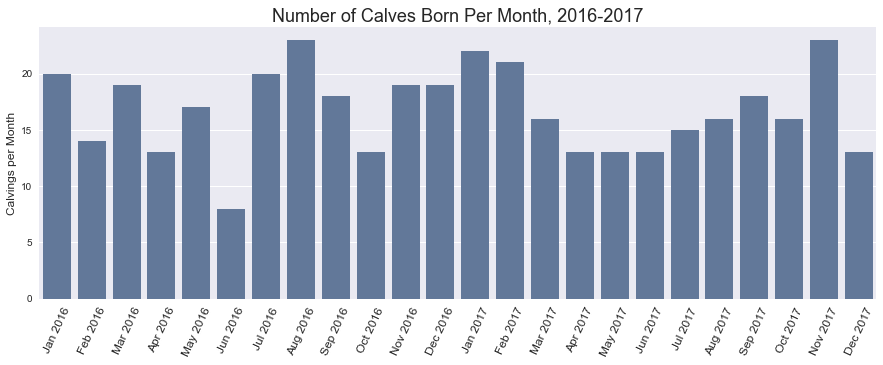

In [4]:

calvings = get_calvings().set_index('calving_date')['2016-01-01':'2017-12-31']
calvings['count'] = 1

print(calvings['2016-01-01':'2016-12-31']['count'].sum())
print(calvings['2017-01-01':'2017-12-31']['count'].sum())

calvings = calvings.resample('M').count()['count'].reset_index()
calvings
calvings['formated_date'] = calvings['calving_date'].dt.strftime('%b %Y')
print(calvings['count'].mean())


fig, ax = plt.subplots(figsize=(15, 5))
_ = sns.barplot(ax=ax, x='formated_date', y='count', data=calvings, color="#5976A2")
_ = plt.ylabel('Calvings per Month', size=12)
_ = plt.xlabel('')
_ = plt.xticks(rotation='65', size=12)
_ = plt.title('Number of Calves Born Per Month, 2016-2017',size=18)
plt.savefig('figures/count_calvings_by_month.png', dpi=300, bbox_inches='tight')